In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.io.wavfile
import hashlib
import itertools
import string
import hashlib
import tkinter as tk
import pyaudio
import time
import random
import pandas as pd
from scipy.fftpack import fft, fftfreq
from tkinter import filedialog
from scipy.io import wavfile
from scipy.signal import butter, lfilter
from math import log, exp

# Probability and Combinatorics Exercise
## Probabilistic Events. Combinatorics and Counting. Distributions

### Problem 1. Exploring Distribution Parameters
A good idea to visualize and explore the parameters of various distributions is just to plot them.

We can do this in either one of two ways:
1. Draw (generate) many random variables which follow that distribution. Plot their histogram
2. Write the distribution function directly and plot it

Either of these will work but the second approach will give us better looking results. [`scipy.stats`](https://docs.scipy.org/doc/scipy-0.19.1/reference/stats.html) has a lot of built-in distributions that we can use. Each of them has its own use cases.

It's very important that we plot discrete and continuous distributions in different ways. **We must not make discrete distributions look continuous**. That is, discrete distributions are only defined for integer number of trials: $n \in \mathbb{N}$.

Let's plot the binomial and Gaussian distributions.

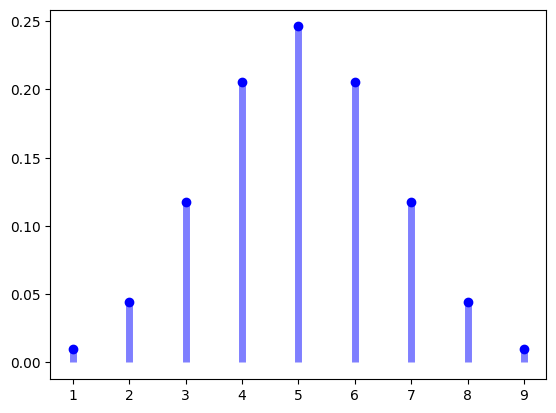

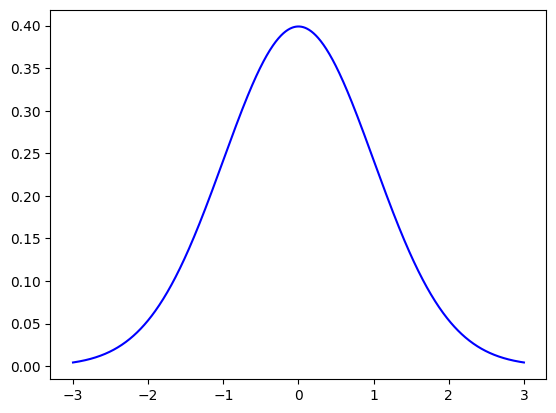

In [3]:
def plot_binomial_distribution(x, n, p):
    """
    Plots the binomial distribution with parameters n and p. The parameter x specifies the values
    where the function is evaluated at
    """
    binomial = scipy.stats.binom.pmf(x, n, p)
    plt.scatter(x, binomial, color = "blue")
    plt.vlines(x, 0, binomial, color = "blue", linewidth = 5, alpha = 0.5)
    plt.show()
    
def plot_gaussian_distribution(mu, sigma, x):
    """
    Plots the Gaussian distribution with parameters mu and sigma. The parameter x specifies 
    the values where the function is evaluated at
    """
    gaussian = scipy.stats.norm.pdf(x, loc = mu, scale = sigma)
    plt.plot(x, gaussian, color = "blue")
    plt.show()
    
x_binomial = np.arange(1, 10)
plot_binomial_distribution(x_binomial, 10, 0.5)

x_gaussian = np.linspace(-3, 3, 1000)
plot_gaussian_distribution(0, 1, x_gaussian)

These look similar. That's with a good reason: the Gaussian distribution is a generalization of the binomial distribution as $n \rightarrow \infty$.

What do these parameters specify exactly? Let's find out. 

Take the binomial distribution. Keep $p = 0.5$ and change $n$. Plot several values of $n$ in the same plot, with different colors. **What values to choose?** Remember that $n$ was the number of experiments, so it should be an integer $\ge 1$.

Now keep $n$ at some reasonable value (a number between 10 and 30 should be good) and change $p$. $p$ is a probability so its values must be between 0 and 1.

What can you conclude? How does the function shape change? When is it symmetrical and when it is not?

Perform the same kind of operations on $\mu$ and $\sigma$ with the Gaussian distribution. What do these parameters represent?

If you get stuck, try to find what the distribution functions should look like on the Internet.

In [4]:
def plot_binomial_distribution(x, n, p, color):
    """
    Plots the binomial distribution with parameters n and p. The parameter x specifies the values
    where the function is evaluated at - rewrite function to plot the graphs on the same plot
    """
    binomial = scipy.stats.binom.pmf(x, n, p)
    plt.scatter(x, binomial, color = color)
    plt.vlines(x, 0, binomial, color = color, linewidth = 5, alpha = 0.5)

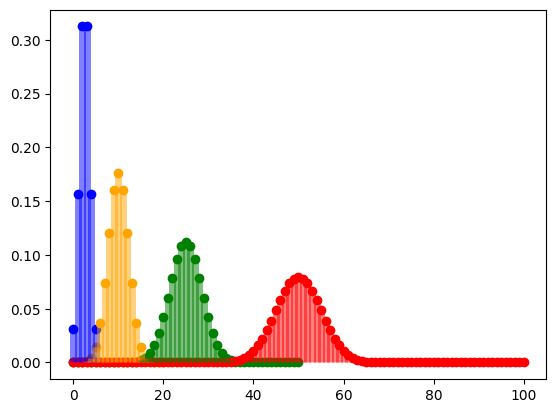

In [5]:
n_values = [5, 20, 50, 100]
colors = ['blue', 'orange', 'green', 'red']

for n, color in zip(n_values, colors):
    x = np.arange(0, n+1)
    plot_binomial_distribution(x, n, 0.5, color)

plt.show()

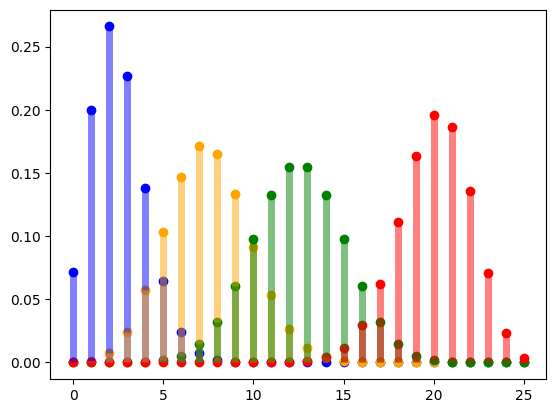

In [6]:
p_values = [0.1, 0.3, 0.5, 0.8]
colors = ['blue', 'orange', 'green', 'red']
n = 25

for p, color in zip(p_values, colors):
    x = np.arange(0, n+1)
    plot_binomial_distribution(x, n, p, color)

plt.show()

We can deduce that $n$ controls how "continuous" the distribution looks - small $n$ makes it discrete and spiky, large $n$ makes it bell-shaped. $p$ picks both the location of the mass and whether the mass is balanced.

In [7]:
def plot_gaussian_distribution(mu, sigma, x, color):
    """
    Plots the Gaussian distribution with parameters mu and sigma. The parameter x specifies 
    the values where the function is evaluated at - rewrite function to plot the graphs on the same plot
    and get color from input
    """
    gaussian = scipy.stats.norm.pdf(x, loc = mu, scale = sigma)
    plt.plot(x, gaussian, color = color)

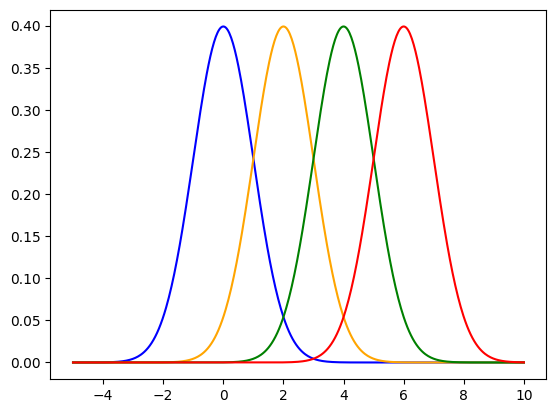

In [8]:
mu_values = [0, 2, 4, 6]
colors = ['blue', 'orange', 'green', 'red']
x = np.linspace(-5, 10, 500)

for mu, color in zip(mu_values, colors):
    plot_gaussian_distribution(mu, 1, x, color)

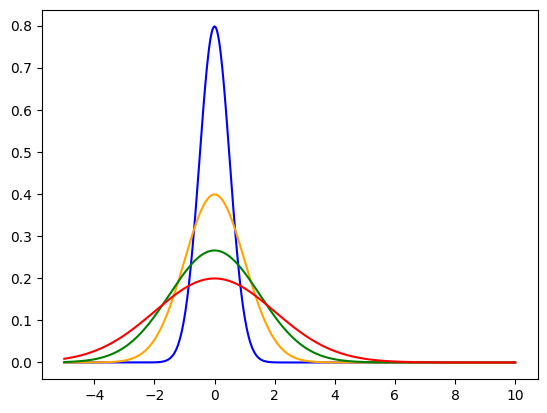

In [9]:
sigma_values = [0.5, 1, 1.5, 2]
colors = ['blue', 'orange', 'green', 'red']
x = np.linspace(-5, 10, 500)

for sigma, color in zip(sigma_values, colors):
    plot_gaussian_distribution(0, sigma, x, color)

As we saw, $\mu$ is the mean (center) of the distribution, $\sigma$ is the controlling the spread (scale) of the distribution.

### Problem 2. Central Limit Theorem
The [**Central Limit Theorem**](https://en.wikipedia.org/wiki/Central_limit_theorem) tells us that no matter what quirky functions we have, their sum is going to be distributed according to the normal distribution. Let's prove this.

Consider the following functions:
$$ f(x) = 1 $$

$$ f(x) = 2x $$

$$ f(x) = 3x^2 $$

$$ f(x) = 4\lvert x - 0,5\rvert $$

$$ f(x) = 2 - 4\lvert x - 0,5\rvert $$

For each of these functions `f`:
1. Generate a big array of, say, 2000 values `x` between 0 and 1
2. Generate the array $f(x)$ and plot $f(x)$. This is just to see how the original function looks
3. Create 1000 experiments like this:
    1. Generate 25 random values $x$ between 0 and 1: `np.random.rand(25)`
    3. Generate $y = f(x)$
    2. Sum all 25 values $y$
    3. Add the sum to the array of sums
4. Plot the distribution of 1000 sums

If you want, you can experiment with the "settings" even more - try changing the number of experiments, number of sums, range of $x$, functions, etc.

What do you get? Can you experiment with a combination of functions? When is the normal distribution a good approximation of the real distribution?

In [10]:
def plot_clt_functions(functions, xs, labels):
    """
    Playing around with the CLT and plotting the functions
    """
    
    for f, label in zip(functions, labels):
        ys = f(xs)
        plt.plot(xs, ys, label=label)
        
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

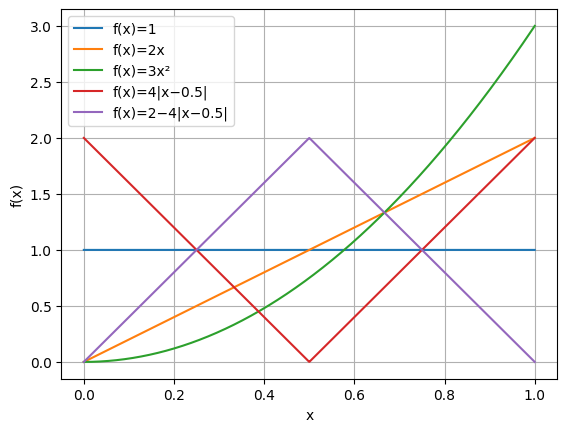

In [11]:
functions = [
    lambda x: np.ones_like(x),
    lambda x: 2 * x,
    lambda x: 3 * (x ** 2),
    lambda x: 4 * np.abs(x - 0.5),
    lambda x: 2 - 4 * np.abs(x - 0.5)
]

labels = [
    "f(x)=1",
    "f(x)=2x",
    "f(x)=3x²",
    "f(x)=4|x−0.5|",
    "f(x)=2−4|x−0.5|"
]

xs = np.linspace(0, 1, 2000)

plot_clt_functions(functions, xs, labels)

In [12]:
def experiments(n_experiments, sample_size, functions):
    """
    Function to plot and conduct an experiment with functions - for each experiment
    we generate random numbers and sum the functions' outputs of them
    """
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()
    
    for ax, f, label in zip(axes, functions, labels):
        sums = []
        for _ in range(n_experiments):
            values = np.random.rand(sample_size)
            ys = f(values)
            sums.append(np.sum(ys))
            
        ax.hist(sums, bins=30, density=True, alpha=0.7, edgecolor='black')
        ax.set_title(f"Sum distribution for {label}")
        ax.grid(True)

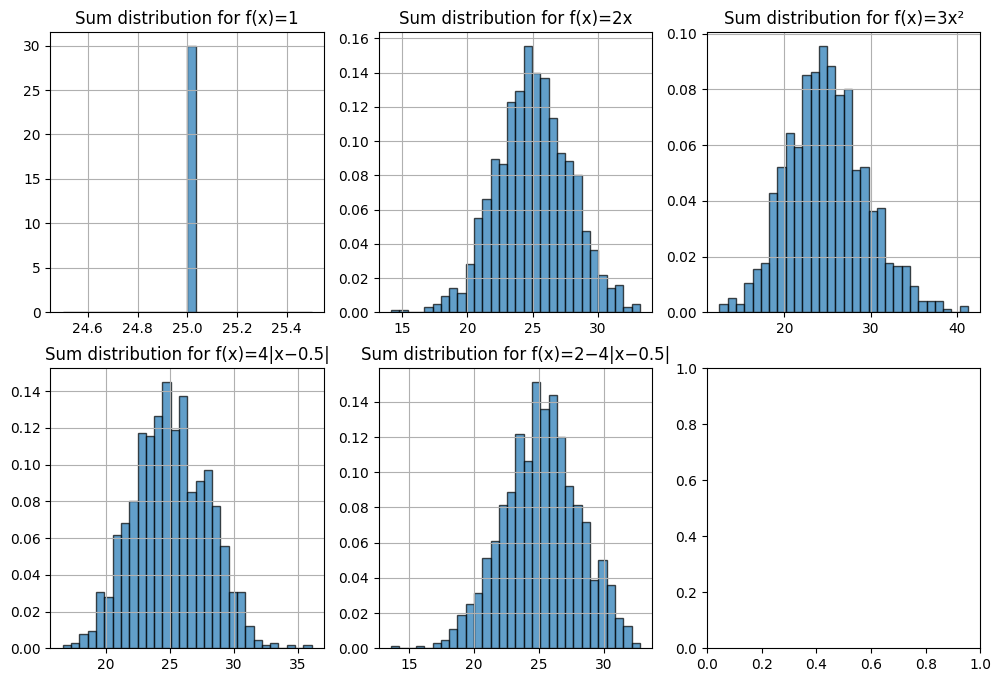

In [13]:
functions = [
    lambda x: np.ones_like(x),
    lambda x: 2 * x,
    lambda x: 3 * (x ** 2),
    lambda x: 4 * np.abs(x - 0.5),
    lambda x: 2 - 4 * np.abs(x - 0.5)
]

n_experiments = 1000
sample_size = 25

experiments(n_experiments, sample_size, functions)

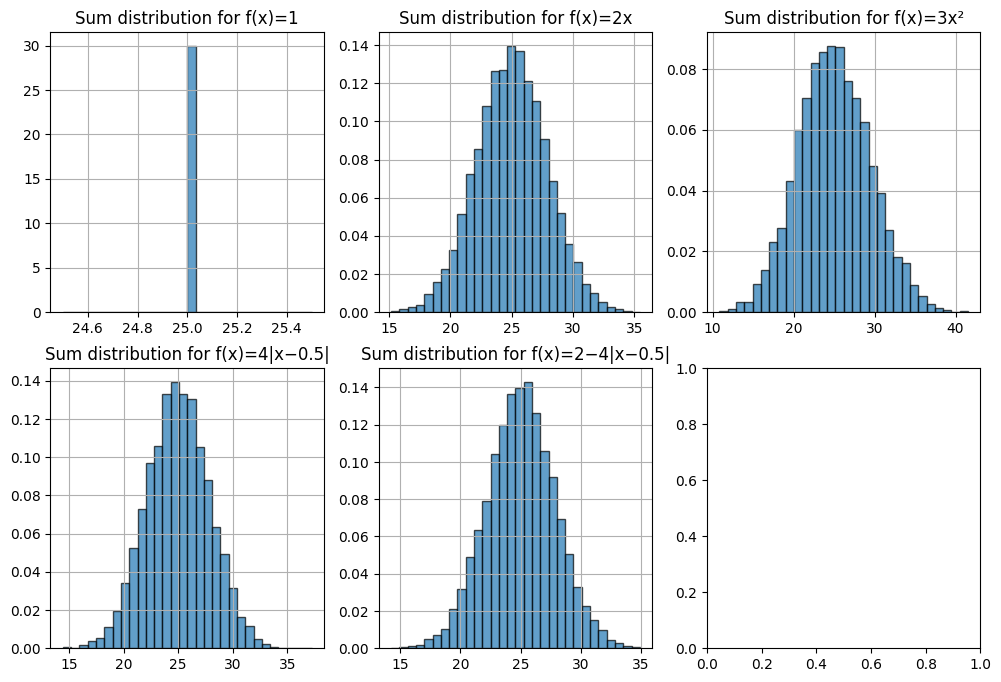

In [14]:
functions = [
    lambda x: np.ones_like(x),
    lambda x: 2 * x,
    lambda x: 3 * (x ** 2),
    lambda x: 4 * np.abs(x - 0.5),
    lambda x: 2 - 4 * np.abs(x - 0.5)
]

n_experiments = 10000
sample_size = 25

experiments(n_experiments, sample_size, functions)

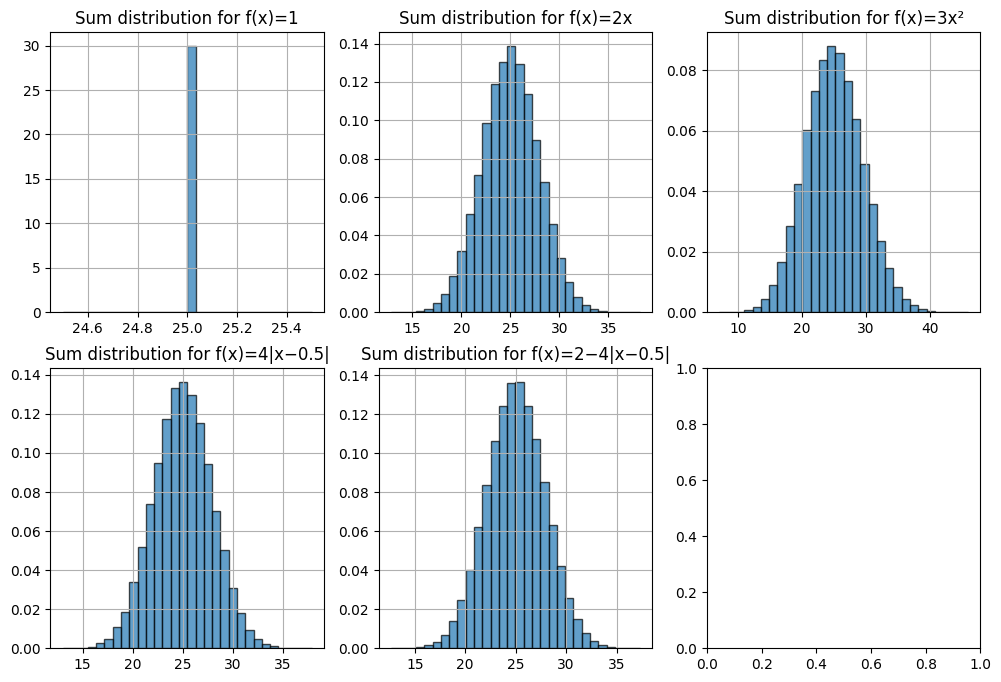

In [15]:
functions = [
    lambda x: np.ones_like(x),
    lambda x: 2 * x,
    lambda x: 3 * (x ** 2),
    lambda x: 4 * np.abs(x - 0.5),
    lambda x: 2 - 4 * np.abs(x - 0.5)
]

n_experiments = 100000
sample_size = 25

experiments(n_experiments, sample_size, functions)

When the number of experiments is low => the function looks noisy/spikey. But as the number of experiments rises, the function starts to look smoother and stabilizes.

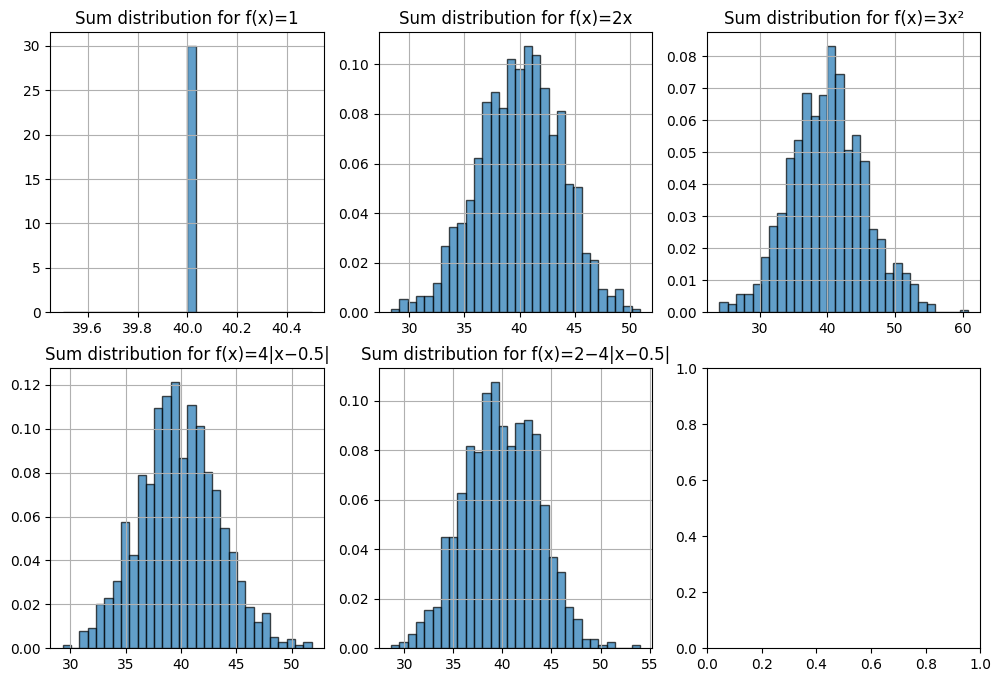

In [16]:
functions = [
    lambda x: np.ones_like(x),
    lambda x: 2 * x,
    lambda x: 3 * (x ** 2),
    lambda x: 4 * np.abs(x - 0.5),
    lambda x: 2 - 4 * np.abs(x - 0.5)
]

n_experiments = 1000
sample_size = 40

experiments(n_experiments, sample_size, functions)

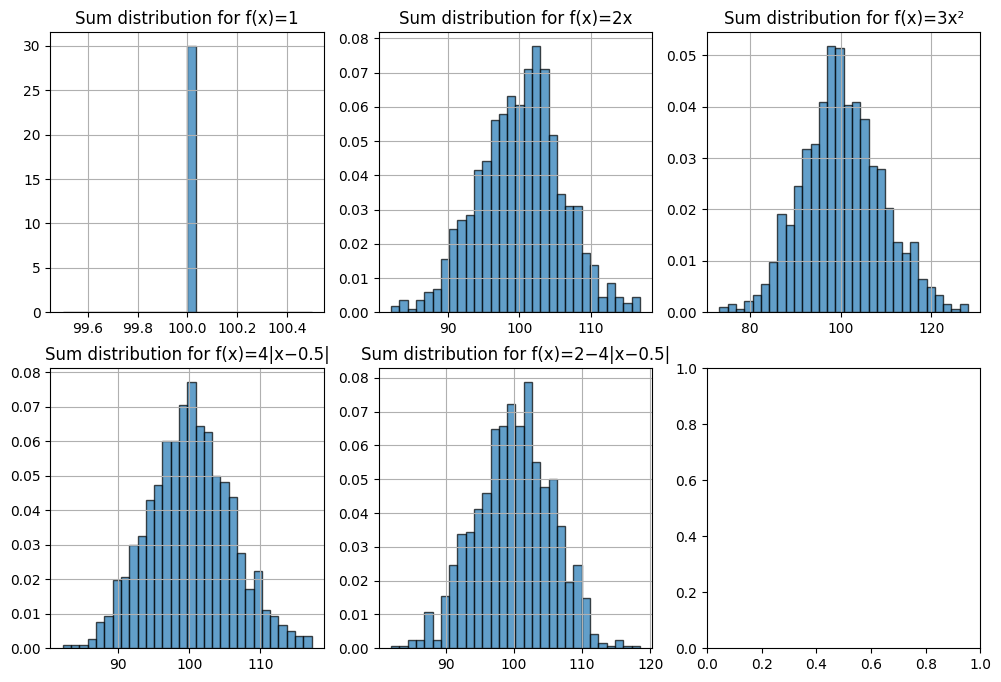

In [17]:
functions = [
    lambda x: np.ones_like(x),
    lambda x: 2 * x,
    lambda x: 3 * (x ** 2),
    lambda x: 4 * np.abs(x - 0.5),
    lambda x: 2 - 4 * np.abs(x - 0.5)
]

n_experiments = 1000
sample_size = 100

experiments(n_experiments, sample_size, functions)

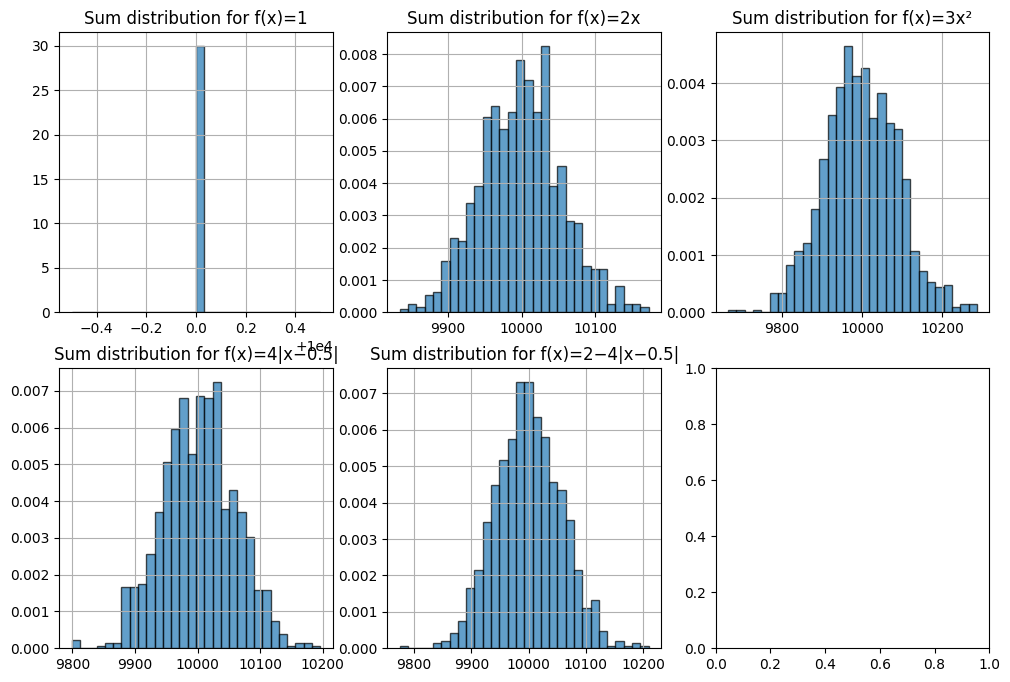

In [18]:
functions = [
    lambda x: np.ones_like(x),
    lambda x: 2 * x,
    lambda x: 3 * (x ** 2),
    lambda x: 4 * np.abs(x - 0.5),
    lambda x: 2 - 4 * np.abs(x - 0.5)
]

n_experiments = 1000
sample_size = 10000

experiments(n_experiments, sample_size, functions)

When the number of samples becommes bigger, the normal shape is nearly perfect (convincingly Gaussian)

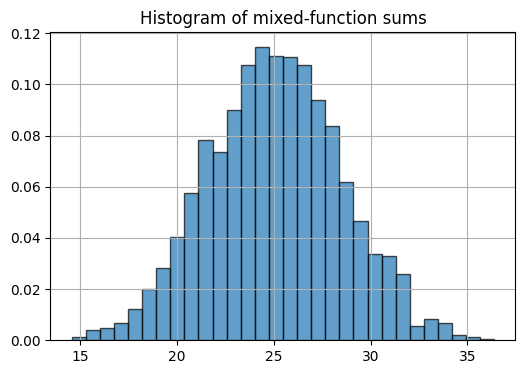

In [19]:
f1 = lambda x: 2  * x
f2 = lambda x: 3 * (x ** 2)
f3 = lambda x: 4 * np.abs(x-0.5)

functions = [f1, f2,f3]
sample_sizes = [10, 8, 7]   
labels = ["2x", "3x²", "4|x–0.5|"]

n_experiments = 2000

totals = [] 

for _ in range(n_experiments):
    grand_sum = 0.0
    
    for f, m in zip(functions, sample_sizes):
        xs = np.random.rand(m)   
        ys = f(xs)
        grand_sum += np.sum(ys)
        
    totals.append(grand_sum)

plt.figure(figsize=(6,4))
plt.hist(totals, bins=30, density=True, alpha=0.7, edgecolor='k')
plt.title("Histogram of mixed‐function sums")
plt.grid(True)
plt.show()

### Problem 3. Birthday Paradox
How many people do we need to have in a room, so that the probability of two people sharing a birthday is $p(A) > 0,5$?

We suppose no leap years, so a year has 365 days. We could expect that we need about $365/2=182$ people. Well, the truth is a bit different.

#### Solution
**Random variable:** $A$: probability that two people share a birthday.

It's sometimes easier to work with the complementary variable: $\bar{A}$ - probability that **no people** share a birthday. 

Let's suppose we have $r$ people in the room. Of course, if $r = 1$, e.g. only one person, the probability is $1$ (there's no one to share a birthday with). If $r >= 365$, the probability must be 1 (by the so-called [pigeonhole principle](https://en.wikipedia.org/wiki/Pigeonhole_principle): if we have 366 people and 365 days, there's at least one day with a pair of people).

Order the people 1 to $r$. Every person's birthday is independent, so that means 365 days for the first, 365 days for the second, and so on: $365^r$ birthday possibilities in total.

We want no duplications of birthdays. The first person has 365 days to choose from, the second has 364, and so on. The $r$th person has $365-r+1$ days to choose from. Total: $365.364.363.\cdots.(365 - r + 1)$

The probability that no people share the same birthday is the fraction of all non-shared birthdays to all possible birthdays:
$$ p(\bar{A})=\frac{365.364.363.\cdots.(365 - r + 1)}{365^r} $$

We're interested in $A$, not $\bar{A}$ and we know that these are complementary, so their probabilities add up to 1
$$p(A) = 1 - p(\bar{A})$$

Write a function which plots the probability of $r$ people sharing a birthday. Remember this is a discrete distribution and should be plotted like so.

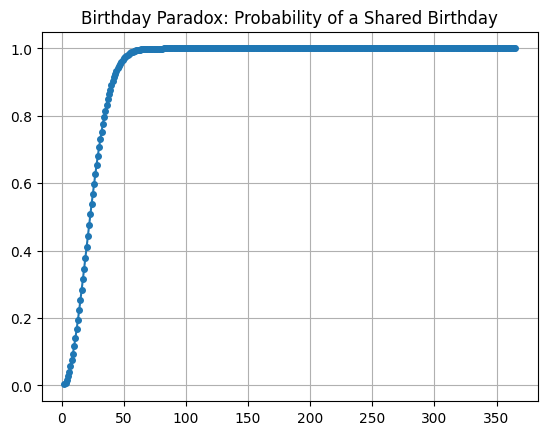

In [20]:
def calculate_birthday_probability(r):
    """
    Returns the probability of r people sharing the same birthday. A year is
    supposed to have 365 days
    """
    
    prob_no_shared = 1.0
    for i in range(r):
        prob_no_shared *= (365 - i) / 365.0
        
    return 1 - prob_no_shared

group_sizes  = np.arange(2, 366)
probabilities = [calculate_birthday_probability(r) for r in group_sizes]

plt.plot(group_sizes, probabilities, marker='o', markersize=4, linestyle='-')
plt.title("Birthday Paradox: Probability of a Shared Birthday")
plt.grid(True)
plt.show()

At how many people do you see a transition from $p(A) < 0,5$ to $p(A) > 0,5$?

**Spoiler alert:** It's 23 people.

Why so few? We're comparing everyone's birthday against everyone else's. We should **NOT** count the number of people, but the number of comparisons. In a room of 23 people, there are 252 total comparisons.

In general, we could get a 50% chance of match using $\sqrt{n}$ people in $n$ days.

## * Breaking Cryptography: Birthday Attack
We already saw that if we have $n$ days in one year, it takes about $\sqrt{n}$ people to have a 50% chance of two people sharing a birthday. This is used in cryptography for the so-called **birthday attack**.

Let's first introduce **hashing functions**. A hashing function is a function which takes text (bits) of any length and  **returns a fixed number of bits**. There are many such functions. Some of them are completely insecure and **ARE NOT** used in cryptography. They're useful for other purposes, such as hash tables.

Important properties of hashing functions:
1. The output will have a fixed length, no matter whether the input is an empty string, one character, a full sentence, a full book or the entire history of mankind
2. A concrete input will always produce the same output

One such hashing function is **MD5**. It produces 128-bit hashes (32 hexadecimal symbols). This means that it takes the space of all possible texts and converts it to $2^{128} \approx 3.10^{38}$ possible hashes. Since the inputs are much more, by the pigeonhole principle, we can expect that many inputs will produce the same output. This is called a **hashing collision**.

The birthday paradox tells us that using $\sqrt{n} = 2^{64} \approx 2.10^{19}$ hashes, we have a 50% probability of collision. This is still a very large number but compare it to $3.10^{38}$ - the difference is immense.

You can see what these numbers mean in terms of CPU speed [here](https://blog.codinghorror.com/speed-hashing/).

There are other algorithms which are even faster. The fastest one returns about $2^{18}$ hashes before it finds a collision.

Another clever attack is using **rainbow tables**. These are massive dictionaries of precomputed hashes. So, for example, if the input is `password123`, its MD5 hash is `482c811da5d5b4bc6d497ffa98491e38`. Every time an algorithm sees this hash, it can convert it to its input. 

Rainbow tables work because humans are more predictable than algorithms. When implementing any cryptography, remember that **humans are always the weakest factor of any cryptographic system**.

**Optional:** Write a function that finds collisions in **MD5** or **SHA1**. See [this](https://www.mscs.dal.ca/~selinger/md5collision/) demo for a good example, or [this StackOverflow post](https://crypto.stackexchange.com/questions/1434/are-there-two-known-strings-which-have-the-same-md5-hash-value) for more examples.

In [21]:
def find_hash_collision(attempts, prefix_bytes=2):
    """
    Attempts to find a hash collision in MD5.
    """
    seen = {}
    for i in range(attempts):
        msg = i.to_bytes((i.bit_length() + 7) // 8 or 1, byteorder='big')
        h = hashlib.new("md5", msg).digest()
        prefix = h[:prefix_bytes]
        if prefix in seen:
            return [seen[prefix], msg, prefix.hex()]
        seen[prefix] = msg
    return None

In [22]:
collision = find_hash_collision(200000)
if collision:
    msg1 = collision[0]
    msg2 = collision[1]
    prefix_hex = collision[2]
    print(f"Collision found on prefix ({prefix_hex}):")
    print(f"Message 1 (bytes): {msg1}")
    print(f"Message 2 (bytes): {msg2}")
else:
    print("No collision found within the attempt limit.")

Collision found on prefix (ad1e):
Message 1 (bytes): b'\x1f'
Message 2 (bytes): b'\xd1'


### Problem 4. Having Fun with Functions. Fourier Transform
Sometimes we can plot a **parametric curve**. We choose a parameter $t$, in this case $t \in [0; 2\pi]$. We then plot $x$ and $y$ as functions of $t$.

Plot the function below.

In [23]:
t = np.linspace(0, 2 * np.pi, 2000)

In [24]:
x = -(721 * np.sin(t)) / 4 + 196 / 3 * np.sin(2 * t) - 86 / 3 * np.sin(3 * t) - 131 / 2 * np.sin(4 * t) + 477 / 14 * np.sin(5 * t) + 27 * np.sin(6 * t) - 29 / 2 * np.sin(7 * t) + 68 / 5 * np.sin(8 * t) + 1 / 10 * np.sin(9 * t) + 23 / 4 * np.sin(10 * t) - 19 / 2 * np.sin(12 * t) - 85 / 21 * np.sin(13 * t) + 2 / 3 * np.sin(14 * t) + 27 / 5 * np.sin(15 * t) + 7 / 4 * np.sin(16 * t) + 17 / 9 * np.sin(17 * t) - 4 * np.sin(18 * t) - 1 / 2 * np.sin(19 * t) + 1 / 6 * np.sin(20 * t) + 6 / 7 * np.sin(21 * t) - 1 / 8 * np.sin(22 * t) + 1 / 3 * np.sin(23 * t) + 3 / 2 * np.sin(24 * t) + 13 / 5 * np.sin(25 * t) + np.sin(26 * t) - 2 * np.sin(27 * t) + 3 / 5 * np.sin(28 * t) - 1 / 5 * np.sin(29 * t) + 1 / 5 * np.sin(30 * t) + (2337 * np.cos(t)) / 8 - 43 / 5 * np.cos(2 * t) + 322 / 5 * np.cos(3 * t) - 117 / 5 * np.cos(4 * t) - 26 / 5 * np.cos(5 * t) - 23 / 3 * np.cos(6 * t) + 143 / 4 * np.cos(7 * t) - 11 / 4 * np.cos(8 * t) - 31 / 3 * np.cos(9 * t) - 13 / 4 * np.cos(10 * t) - 9 / 2 * np.cos(11 * t) + 41 / 20 * np.cos(12 * t) + 8 * np.cos(13 * t) + 2 / 3 * np.cos(14 * t) + 6 * np.cos(15 * t) + 17 / 4 * np.cos(16 * t) - 3 / 2 * np.cos(17 * t) - 29 / 10 * np.cos(18 * t) + 11 / 6 * np.cos(19 * t) + 12 / 5 * np.cos(20 * t) + 3 / 2 * np.cos(21 * t) + 11 / 12 * np.cos(22 * t) - 4 / 5 * np.cos(23 * t) + np.cos(24 * t) + 17 / 8 * np.cos(25 * t) - 7 / 2 * np.cos(26 * t) - 5 / 6 * np.cos(27 * t) - 11 / 10 * np.cos(28 * t) + 1 / 2 * np.cos(29 * t) - 1 / 5 * np.cos(30 * t)
y = -(637 * np.sin(t)) / 2 - 188 / 5 * np.sin(2 * t) - 11 / 7 * np.sin(3 * t) - 12 / 5 * np.sin(4 * t) + 11 / 3 * np.sin(5 * t) - 37 / 4 * np.sin(6 * t) + 8 / 3 * np.sin(7 * t) + 65 / 6 * np.sin(8 * t) - 32 / 5 * np.sin(9 * t) - 41 / 4 * np.sin(10 * t) - 38 / 3 * np.sin(11 * t) - 47 / 8 * np.sin(12 * t) + 5 / 4 * np.sin(13 * t) - 41 / 7 * np.sin(14 * t) - 7 / 3 * np.sin(15 * t) - 13 / 7 * np.sin(16 * t) + 17 / 4 * np.sin(17 * t) - 9 / 4 * np.sin(18 * t) + 8 / 9 * np.sin(19 * t) + 3 / 5 * np.sin(20 * t) - 2 / 5 * np.sin(21 * t) + 4 / 3 * np.sin(22 * t) + 1 / 3 * np.sin(23 * t) + 3 / 5 * np.sin(24 * t) - 3 / 5 * np.sin(25 * t) + 6 / 5 * np.sin(26 * t) - 1 / 5 * np.sin(27 * t) + 10 / 9 * np.sin(28 * t) + 1 / 3 * np.sin(29 * t) - 3 / 4 * \
    np.sin(30 * t) - (125 * np.cos(t)) / 2 - 521 / 9 * np.cos(2 * t) - 359 / 3 * np.cos(3 * t) + 47 / 3 * np.cos(4 * t) - 33 / 2 * np.cos(5 * t) - 5 / 4 * np.cos(6 * t) + 31 / 8 * np.cos(7 * t) + 9 / 10 * np.cos(8 * t) - 119 / 4 * np.cos(9 * t) - 17 / 2 * np.cos(10 * t) + 22 / 3 * np.cos(11 * t) + 15 / 4 * np.cos(12 * t) - 5 / 2 * np.cos(13 * t) + 19 / 6 * np.cos(14 * t) + \
    7 / 4 * np.cos(15 * t) + 31 / 4 * np.cos(16 * t) - np.cos(17 * t) + 11 / 10 * np.cos(18 * t) - 2 / 3 * np.cos(19 * t) + 13 / 3 * np.cos(20 * t) - 5 / 4 * np.cos(21 * t) + 2 / 3 * np.cos(
        22 * t) + 1 / 4 * np.cos(23 * t) + 5 / 6 * np.cos(24 * t) + 3 / 4 * np.cos(26 * t) - 1 / 2 * np.cos(27 * t) - 1 / 10 * np.cos(28 * t) - 1 / 3 * np.cos(29 * t) - 1 / 19 * np.cos(30 * t)

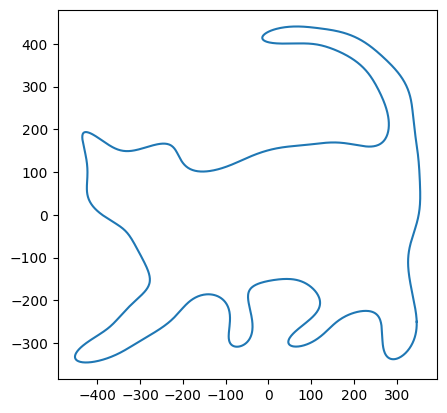

In [25]:
plt.gca().set_aspect("equal")
plt.plot(x, y)
plt.show()

Interesting... 

Have a closer look at the variables `x` and `y`. Note that they're linear combinations of sines and cosines. There's nothing more except sines and cosines, multiplied by coefficients. How are these able to generate the picture? Can we generate any picture?

Yes, we can generate pretty much anything and plot it as a parametric curve. See [this](https://www.wolframalpha.com/input/?i=Schroedinger+cat+bra-ket+curve) for example.

It turns out that **every function**, no matter what, can be represented as a linear combination of sines and cosines. This is the basis of the **Fourier transform**. We'll look at it from two different perspectives: the algebraic one and the practical one.

#### Algebraic perspective: Why does this transform exist? What does it mean?
All functions form a **vector space**. We can see them as vectors. These vectors have infinitely many components which correspond to the infinitely many values $x \in (-\infty; \infty)$. The function space has infinitely many dimensions.

We can find a basis in that space. After we've found a basis, we can express any other function as a linear combination of the basis functions. Any set of infinitely many linearly independent functions will work. But that doesn't help at all...

We know that the best kind of basis is an *orthonormal basis*. This means that all basis vectors are orthogonal and each basis vector has "length" 1. 

Two vectors are orthogonal if their dot product is zero. Similarly, two functions are defined to be orthogonal if their  product is zero, like this:
$$ \int_a^b f(x)g(x)\,\text{d}x = 0 $$

It can be shown that $1$, $\cos(mx)$ and $\sin(nx)$ ($m,n \in \mathbb{N}$) are orthogonal. So, the basis formed by them is orthogonal. They can also be made orthonormal if we divide by their norm. The norm of a function is defined by **functional analysis** - an area of mathematics which treats functions as vectors. We won't go into much more detail now. The norm for $1$ is 1, the norm for the trigonometric functions is $1/\sqrt{2}$.

The takeaway is that ${1, \sqrt{2}\cos(mx), \sqrt{2}\sin(nx),\ m,n \in \mathbb{N}}$ is an orthonormal basis in the function space. 

All periodic functions with period $P$ can be described as linear combinations of these:
$$ f(x) = \frac{a_0}{2} + \sum\left(a_n\cos\left(\frac{2\pi nx}{P}\right)+b_n\sin\left(\frac{2\pi nx}{P}\right)\right) $$

This definition extends to non-periodic functions as well.

#### Engineering perspective
In engineering, the Fourier transform **converts a function of time to a function of frequency**. The function of time is called a **signal**, and the function of frequency is the **spectrum** of that signal. There is a pair of functions - one inverts the other. We have two different options:
1. We can inspect the spectrum
2. We can modify the spectrum

This means that if some operation is very easy to perform in the spectrum we can perform it there using these steps:
1. Create the spectrum from the signal - Fourier transform
2. Perform the operation, e.g. remove a specific frequency
3. Create the corrected signal from the corrected spectrum - inverse Fourier transform

One example usage is in audio processing. An audio signal is a  1D array of **samples** (numbers). Each audio signal has a *bitrate* which tells us how many samples are there in one second. Since audio is a function of time, we can easily get its spectrum.

Some algorithms on images use the spectrum as well. The idea is exactly the same.

Compare this entire process to how we created a **histogram**. Plotting a random variable $X$ as a function of the trial number is essentially plotting a function of time. To get the histogram, we counted how many times we saw each particular value. This is the same as taking the spectrum of the random variable.

### Problem 5. Working with Audio Files. Using the Fourier Transform
In Python, it's easiest to work with `.wav` files. If we have other files, we can convert them first. To load audio files, we can use `scipy.io.wavfile`. Load the `c-note.wav` file. Use only one channel, e.g. the left one.

C:\Users\Jerry\AppData\Local\Temp\ipykernel_23004\904109134.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  bitrate, audio = scipy.io.wavfile.read("c-note.wav")


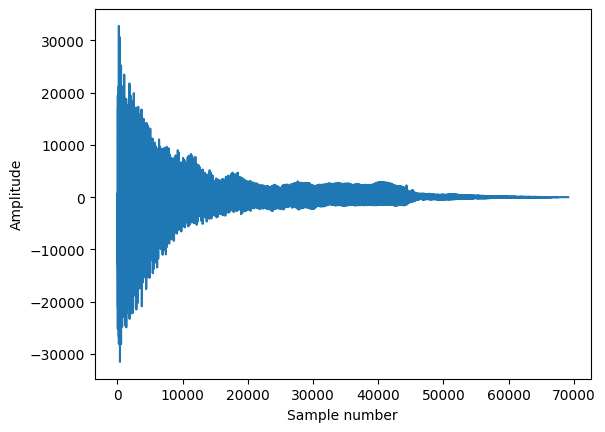

In [26]:
bitrate, audio = scipy.io.wavfile.read("c-note.wav")
left_channel = audio[:, 0]
right_channel = audio[:, 1]
plt.plot(left_channel)
plt.xlabel("Sample number") # To get seconds, divide by the bitrate
plt.ylabel("Amplitude")
plt.show()

C:\Users\Jerry\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Jerry\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


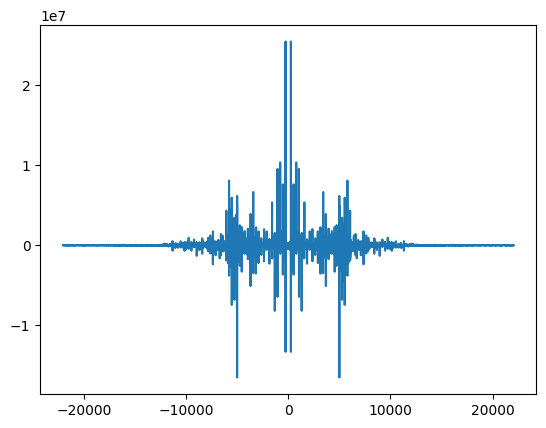

In [27]:
left_fft = fft(left_channel)

# fftfreq() returns the frequences in number of cycles per sample. Since we have `bitrate` samples in one second,
# to get the frequencies in Hz, we have to multiply by the bitrate
frequencies = fftfreq(len(left_channel)) * bitrate

plt.plot(frequencies, left_fft)
plt.show()

Note that the signal is symmetric. This is always the case with Fourier transform. We are interested in only half the values (the ones which are $\ge 0$).

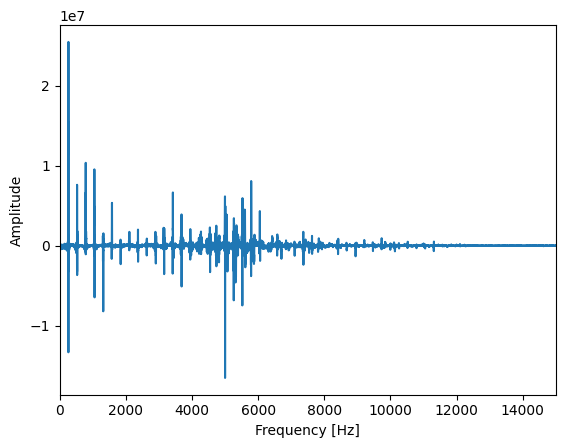

In [28]:
plt.plot(frequencies, left_fft)
plt.xlim((0, 15000))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

We can see that some frequencies have higher intensities than others. Also, they are evenly spaced. This is because the sample is only one note: C4, which has a fundamental frequency of $261,6Hz$. Most other "loud" frequencies are a multiple of the fundamental frequency: these are called **obertones**. There are other frequencies as well. The combination of frequencies which one instrument emphasizes and the ones that it dampens (i.e. makes quiet) determines the specific sound, or **timbre** of that instrument.

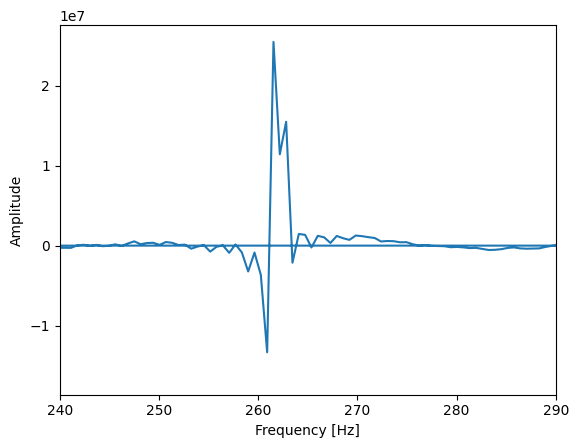

In [29]:
plt.plot(frequencies, left_fft)
plt.xlim((240, 290))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

An interesting application of this is removal of unwanted frequencies. Look at [this video](https://www.youtube.com/watch?v=ATVbnilxIrs) for example. The highly annoying vuvuzela of 2010 World Cup turns out to produce only a single frequency which can be very easily removed from a recording.

Another interesting application of Fourier transform is filters (in audio and images).

### * Problem 6. Breaking MD5 in Different Ways
One relatively fast algorithm: $2^{18}$ instead of $2^{19}$ hashes for a 50% probability is described in [this](https://eprint.iacr.org/2013/170.pdf) article. It's the fastest known to date to break the MD5 function by brute force. Get familiar with it and implement the algorithm. Try to show how it works on some common (and short) plaintexts.

Experiment with other types of breaking the hash, for example using rainbow tables.

You can use the following checklist:
* What is a hash function? When are hash functions used?
* What is a cryptographic hash function?
* Why and how is a collision possible?
* What is a collision attack?
* What are the most common ways to attack hash functions?
    * Which cryptographic hash functions are no longer considered secure? Why?
* Why do websites have to store hashes of passwords instead of plaintext?
    * How does user login work?
* What is the "birthday attack"?
    * Provide an example of two plaintexts which produce the same hash
* What is the algorithm in the article about?
    * Implement it and show the result
* What is a rainbow table?
    * Try breaking common passwords using a rainbow table. You can generate one or use some table from the internet (e.g. English words and letters, their modifications, leaked passwords, etc.)
    * Even better, try a rainbow table first. If it doesn't work, try brute force
* How can a website protect its database against rainbow tables?
    * What is a "salt"? Additionally, what is "pepper"?
    * Is it always secure to hash a password multiple times? What advantages and disadvantages does this provide?

### Hashing, attacking, collisions

#### Abstract

This research delves into the mechanisms and implications of rainbow table and brute-force attacks on password security, also on hash functions and collisions as terms. By examining the methodologies of the attacks, we highlight the vulnerabilities inherent in systems employing unsalted or weakly hashed passwords. The study explains the critical importance of implementing strong security measures, such as salting, peppering, and utilizing strong hashing algorithms.

#### 1. Hash functions

A) Meaning - A hash function is a mathematical algorithm that takes an input (or "message") of any length and produces a fixed-length string of characters, which is typically a hash value. The output is typically a fixed-size string of numbers and letters (e.g., a 128-bit or 256-bit string). For any given input, the hash function will always produce the same output. The hash function is computationally efficient to evaluate the output. It is computationally hard to reverse the hash function — it should be difficult to determine the original input by using the hash value. It should be very hard to find two different inputs that produce the same hash value (collision). A small change in the input data should produce a significantly different hash value.

B) Usage - Hash functions are used to store passwords securely. Rather than storing the actual password, a hashed version of the password is saved. When a user logs in, the entered password is hashed, and the resulting hash is compared with the stored hash. Also, hash functions are used in digital signatures to ensure the integrity and authenticity of messages or documents. The message is hashed, and then the hash value is encrypted with the sender's private key. The recipient can then use the sender's public key to verify the authenticity of the message. Hash functions are also used in hash tables to quickly locate a data record given its search key. The hash function generates an index from the key, allowing constant time access for data retrieval.

C) Cryptographic Hash Functions - a type of hash function that is specifically designed for use in cryptographic applications. It has additional security properties that make it suitable for use in applications like digital signatures, message authentication codes (MACs), and data integrity checks. Given a hash value, it should be infeasible to find the corresponding input that produced that hash. It should be impossible to find two distinct inputs that hash to the same value. Given an input, it should be impossible to find another input that produces the same hash value. A small change in the input should produce a completely different hash value. Popular examples include MD5, SHA-1, SHA-3 / SHA-256, RIPEMD-160.

#### 2. Collisions

A) Meaning - a collision occurs when two distinct inputs produce the same hash value. This is a problem because the primary purpose of a hash function is to map unique inputs to unique outputs, creating a one-to-one mapping. When a collision occurs, it breaks this unique mapping and undermines the integrity and reliability of the hash function. A hash function always produces a fixed-length output (a 256-bit hash for SHA-256). However, the set of possible inputs is infinite. Because the output space is finite, there are only a limited number of possible hash values, but an infinite number of possible input combinations. This makes it inevitable that some distinct inputs will eventually map to the same hash value. This is a consequence of the pigeonhole principle: If more items are placed into fewer containers than there are items, at least one container must hold more than one item.

B) Collision Attacks - a type of cryptographic attack that targets a hash function in order to find two distinct inputs that hash to the same output (collision). The purpose of the attack is to exploit the collision to undermine the security or integrity of a system that relies on the hash function. For example, both MD5 and SHA-1 were once widely used hash functions. However, due to advances in cryptanalysis, they have been found to be vulnerable to collision attacks.

#### 3. Attacks and handling log-in process

A) Ways to attack a hash function:

1.1. Brute Force - trying every possible input until a matching hash is found, the attack's effectiveness depends on the hash function's output length and complexity.

1.2. Collision Attack - try to find two distinct inputs that hash to the same output.

1.3. Pre-Image Attack - try to find an input that hashes to a specific given hash value.

1.4. Raibow Table Attack - precomputing hashes for a large list of possible inputs (common passwords) and storing them in a table. When a hash is encountered, the attacker looks it up in the table to find the corresponding plaintext input.

B) Lack of security - cryptographic hash functions - in simple words, they are vulnerable to collision attacks, the algorithms' relatively small output size makes them particularly vulnerable.

C) Storing hashes of passwords - passwords are stored in websites' databases because if passwords were stored in plaintext, anyone with access to the database could see the users' actual passwords, which could lead to massive security breaches. By storing a hash of the password instead of the password itself, even if the database is compromised, the attacker only obtains a hash, not the actual password. The original password cannot be easily retrieved from the hash.

D) User-login process - the user firsly needs to register: they create an account and chooses a password, the system generates a salt (a random string) and combines it with the password, they are hashed together using a cryptographic hash function and then are stored in the database (not the plaintext password). Secondly, they need to log in - when the user tries to log in, they enter their password, the system retrieves the salt associated with that user (from the DB), the system hashes the entered password with the same salt used during the process, te newly hashed password is compared to the stored hash in the database and if the hashes match, the login is successful; if not, the login is denied.

#### 4. "Birthday" attack

A type of collision attack that exploits the mathematics behind the birthday paradox to find collisions in hash functions more efficiently than a brute-force approach. The birthday paradox tells us that finding two different inputs that produce the same hash (a collision) is easier than it might initially seem. In a hash function with an output of $n$ bits, the birthday attack suggests that finding a collision requires only $2 ^ {n/2}$ operations, not $2 ^ n$ operations as a naive approach would suggest. This is because we're not looking for a specific input that produces a given hash, but rather any two distinct inputs that happen to hash to the same value. In a birthday attack, an attacker tries to find two different inputs that produce the same hash. The attacker doesn't need to guess the exact value of a hash; they just need to find any two inputs that produce the same hash. This significantly reduces the amount of work needed to find a collision.

Example:

Here are two different plaintexts that produce the same MD5 hash:

    Plaintext 1: d131dd02c5e6eec4

    Plaintext 2: d131dd02c5e6eec4

When hashed using MD5, both of these distinct inputs will produce the same hash value:

$$ MD5('d131dd02c5e6eec4') = 098f6bcd4621d373cade4e832627b4f6 $$

#### 5. MD5 Attack Algorithm

The attack takes advantage from the weaknesses in MD5's compression function, particularly its difference inheriting and message expanding properties. By carefully selecting input differences with minimal strong conditions and utilizing a divide-and-conquer strategy, the researchers significantly reduced the computational complexity of finding collisions. The implementation is quite complex, so we would not implement it at the moment.

#### 6. Rainbow tables

A rainbow table is a precomputed database of plaintext passwords and their corresponding hash values. Here it is used to reverse-engineer hashed passwords efficiently. Instead of computing the hash for every password guess during an attack, a rainbow table allows attackers to look up the hash in the table and retrieve the original password quickly. This method is particularly effective against unsalted hashes, where the same password always results in the same hash. The efficiency of rainbow tables comes from the time-memory trade-off: they require significant storage space but allow for rapid password recovery without computing hashes during the attack.

In [30]:
def brute_force_password(target_password, max_length):
    """
    Function to try to brute-force a password
    """
    characters = string.ascii_lowercase 

    for length in range(1, max_length + 1):
        for guess_tuple in itertools.product(characters, repeat=length):
            guess = ''.join(guess_tuple)
            if guess == target_password:
                print(f"Password found: '{guess}'.")
                return
                
    print("Password not found.")

In [31]:
def crack_password(common_passwords, target):
    """
    Function for trying to crack a password (hashed with MD5)
    """
    
    rainbow_table = {hashlib.md5(password.encode()).hexdigest(): password for password in common_passwords}
    
    target_hash = hashlib.md5(target.encode()).hexdigest()
    
    cracked_password = rainbow_table.get(target_hash)
    
    if cracked_password:
        print(f"Password found: {cracked_password}")
    else:
        print(f"Password not found in the rainbow table.")
        brute_force_password(target, 1024)

In [32]:
common_passwords = ['mypassword', '1234567890', 'qwerty', 'administrator', 'admin']
target = 'administrator'
crack_password(common_passwords, target)

Password found: administrator


In [33]:
# Uncomment when you want to run the simulation - keep in mind, it could take long!
#target = 'supercoolpasswordbe'
#crack_password(common_passwords, target)

#### 7. Protection from Rainbow Tables

A) Salt - a unique, random string added to a password before hashing. This ensures that identical passwords result in different hashes, preventing precomputed attacks like rainbow tables. Salts are typically stored alongside the hashed password in the database.

B) Pepper - a secret value added to a password before hashing, similar to a salt but kept secret and stored separately from the database. This adds an additional layer of security, as an attacker would need access to both the database and the pepper to crack the passwords.

C) Hashing multiple times - hashing a password multiple times, known as key stretching, can enhance security by increasing the computational effort required to crack the password. However, it's very important to use established algorithms designed for this purpose: PBKDF2, Argon2, etc. In this way, the algorithm increases resistance to brute-force attacks by making each guess more computationally expensive. However, improper implementation can lead to vulnerabilities.

D) Practices for password security -  Implement algorithms like bcrypt, scrypt, or Argon2 that are designed for secure password hashing. Generate a unique, random salt for each password and store it alongside the hashed password. Add a secret pepper to passwords before hashing and store it securely, separate from the database. Ensure that salts and hashed passwords are stored securely, and peppers are kept confidential and separate from the database. By following these practices, websites can significantly enhance their defence against rainbow table attacks and ensure password security.

#### 8. Conclusion

In summary, this article about the importance of rainbow table and brute-force attacks reveals significant risks associated with inadequate password protection strategies. The effectiveness of these attacks is boosted by the absence of salting and the use of outdated hashing algorithms. To enhance security, it is essential to adopt comprehensive measures, including the application of unique salts, the integration of secret peppers, and the deployment of advanced hashing functions like bcrypt or Argon2. 

### ** Problem 7. Audio Filters and Equalizers
Examine the behaviour of different filters and their influence on the input signal. The main kinds of filters are
* High-pass / low-pass
* Band-pass / band-stop

You can use the following checklist:
* What is a signal? What is time domain? What is frequency domain?
* How does the Fourier transform work?
    * Provide one (or more) examples with code
    * Optionally, show plots of some common functions (sine, step, pulse, sinc, gaussian) and their Fourier spectrums
* What is a filter?
* How does each type of filter work?
    * Provide examples, possibly with real data
* How do we combine filters and why?
* What is an equalizer?
    * Optionally, create an equalizer program or plugin that allows the user to emphasize or dampen different frequencies

### Signals, Fourier transformations, Filters

#### Abstract

#### 1. Signal, time domain, frequency domain

A) Signal - A signal is a function of one or more variables that indicate some (usually physical) phenomenon. Signal serves as carriers of information between communication devices. They can convey different types of information depending on the application required. These signals can be of different forms. For example: human voice and sound waves, position, speed, and acceleration of an aircraft, digital music recording, etc. There are different types of signals. For example: analog signals, digital signals, real and complex signals, etc.

B) Time domain -  shows how a signal changes over time, illustrating amplitude variations at each moment.

C) Frequency domain - reveals the signal's frequency components, indicating how much of the signal lies within each given frequency band over a range of frequencies.

#### 2. Fourier Transforms

The Fourier Transform decomposes a time-domain signal into its constituent frequencies, providing a frequency-domain representation. This is used in signal processing and allows the analysis and manipulation of signals based on their frequency content.

In [34]:
def fourier_transform_graph(t, signal):
    """
    Function to display the Fourier transform of a signal.
    """

    fs = 1 / (t[1] - t[0])  
    
    yf = fft(signal)
    xf = fftfreq(len(t), 1/fs)
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(t, signal)
    plt.title("Signal - Time Domain")
    plt.xlabel("Time [sec]")
    plt.ylabel("Amplitude")
    
    plt.subplot(1, 2, 2)
    plt.plot(xf, np.abs(yf))
    plt.title("Signal - Frequency Domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    
    plt.tight_layout()
    plt.show()

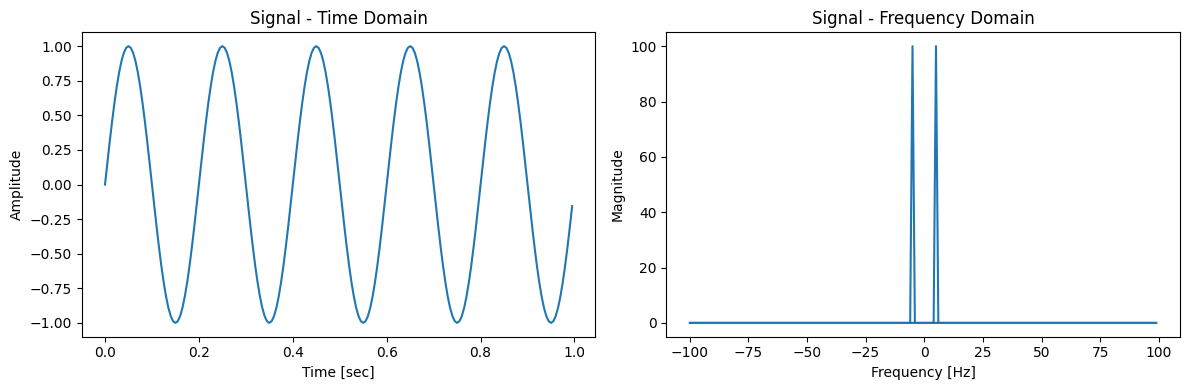

In [35]:
frequency_of_graph = 200  
t = np.linspace(0, 1, frequency_of_graph, endpoint=False)
frequency_of_function = 5  
signal = np.sin(2 * np.pi * frequency_of_function * t) 

fourier_transform_graph(t, signal)

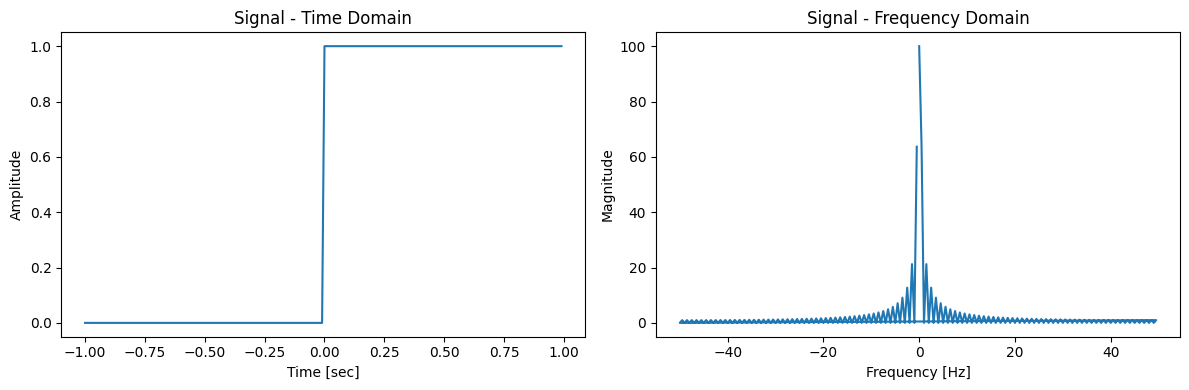

In [36]:
t = np.linspace(-1, 1, 200, endpoint=False)
signal = np.heaviside(t, 1)

fourier_transform_graph(t, signal)

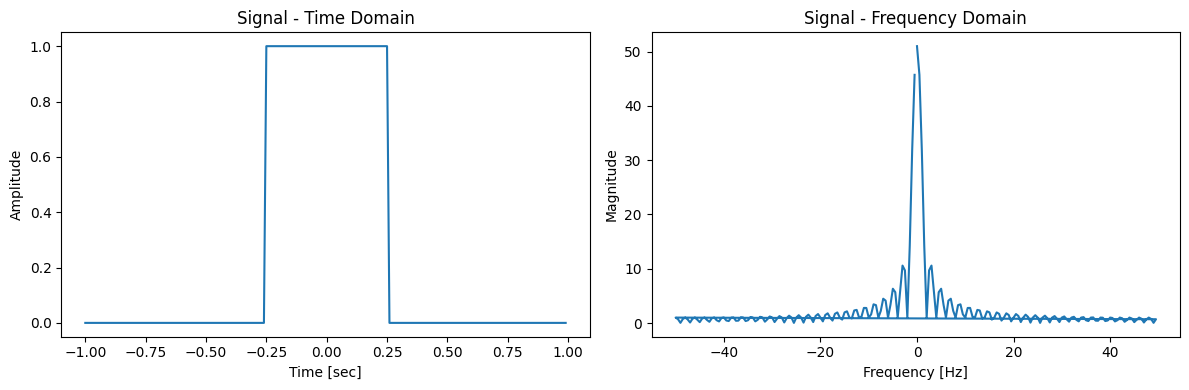

In [37]:
t = np.linspace(-1, 1, 200, endpoint=False)
signal = np.where(np.abs(t) <= 0.25, 1.0, 0.0)

fourier_transform_graph(t, signal)

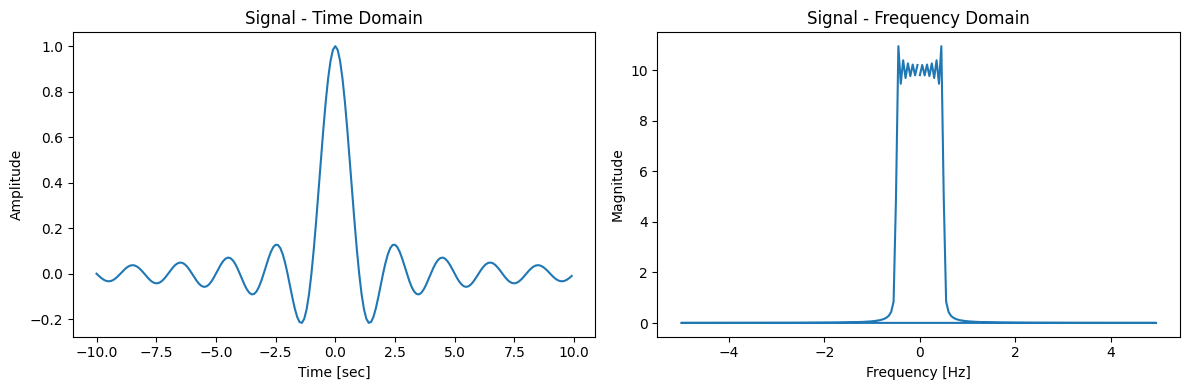

In [38]:
t = np.linspace(-10, 10, 200, endpoint=False)
signal = np.sinc(t)

fourier_transform_graph(t, signal)

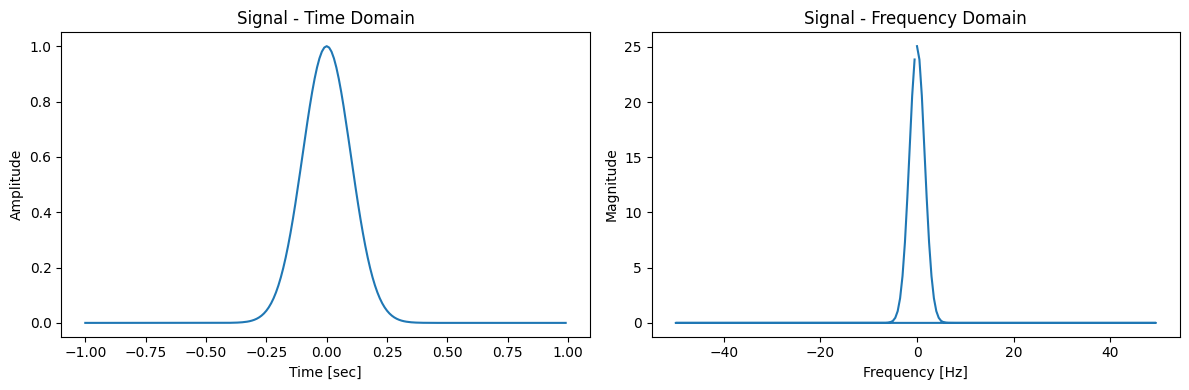

In [39]:
t = np.linspace(-1, 1, 200, endpoint=False)
sigma = 0.1
signal = np.exp(-t**2 / (2 * sigma**2))

fourier_transform_graph(t, signal)

#### 3. Filters

A) Meaning - a device or algorithm that selectively allows certain components of a signal to pass through while attenuating or eliminating others. They are essential for modifying signals, such as removing noise, extracting useful information, or separating overlapping signals.

B) Types:

Low-Pass Filter (LPF) - allows frequencies below a specified cutoff frequency to pass through while attenuating higher frequencies.

High-Pass Filter (HPF) - allows frequencies above a specified cutoff frequency to pass through while attenuating lower frequencies.

Band-Pass Filter (BPF) - allows frequencies within a specific range (band) to pass through while attenuating frequencies outside this range.

Band-Stop Filter (BSF) - attenuates frequencies within a specific range while allowing frequencies outside this range to pass through.

C) Examples:

LPF - Smoothing out a noisy ECG signal to better observe heartbeats.

HPF - Removing baseline wander in EEG signals to focus on brain activity.

BPF - Extracting the alpha wave band (8–12 Hz) from EEG data for neurological studies.

BSF - Removing 50/60 Hz power line interference from biomedical signals.

D) Combining Filters

Combining filters enhances the ability to target specific frequency components, improve signal clarity, and tailor the processing to specific application needs. Here are two types of combining:

Sequential Filtering: Applying multiple filters in sequence to achieve a desired effect.

Parallel Filtering: Processing the same signal through different filters simultaneously and combining the results.

#### 4. Equalizers

A) Meaning - an audio processing tool that adjusts the balance of frequency components within an audio signal. It allows users to boost or attenuate specific frequency ranges, tailoring the sound to achieve desired tonal characteristics or to compensate for acoustic anomalies.

B) Types

Graphic Equalizer: Provides fixed frequency bands with sliders to adjust the gain for each band. The visual layout resembles a graph, hence the name.

Parametric Equalizer: Offers control over the amplitude, center frequency, and bandwidth (Q factor) for each band, allowing precise adjustments.

Shelving Equalizer: Adjusts the gain of all frequencies above (high-shelf) or below (low-shelf) a certain cutoff frequency.

In [40]:
BANDS = [
    (20, 60),
    (60, 170),
    (170, 310),
    (310, 600),
    (600, 1000),
    (1000, 3000)
]

class EqualizerApp:
    def __init__(self, master):
        self.master = master
        self.master.title("6-Band Audio Equalizer")

        self.sliders = []
        for i, (low, high) in enumerate(BANDS):
            frame = tk.Frame(master)
            frame.pack()
            label = tk.Label(frame, text=f"{low}-{high} Hz")
            label.pack(side=tk.LEFT)
            slider = tk.Scale(frame, from_=-10, to=10, orient=tk.HORIZONTAL, resolution=1)
            slider.pack(side=tk.LEFT)
            self.sliders.append(slider)

        self.load_button = tk.Button(master, text="Load WAV File", command=self.load_file)
        self.load_button.pack()

        self.play_button = tk.Button(master, text="Play Equalized Audio", command=self.play_audio)
        self.play_button.pack()

        self.fs = None
        self.audio_data = None

    def load_file(self):
        file_path = filedialog.askopenfilename(filetypes=[("WAV files", "*.wav")])
        if file_path:
            self.fs, data = wavfile.read(file_path)
            if data.ndim > 1:
                data = data.mean(axis=1) 
            self.audio_data = data.astype(np.float32)

    def bandpass_filter(self, data, lowcut, highcut, fs, order=2):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(order, [low, high], btype='band')
        y = lfilter(b, a, data)
        return y

    def apply_equalizer(self):
        if self.audio_data is None:
            return None
        output = np.zeros_like(self.audio_data)
        for i, (low, high) in enumerate(BANDS):
            gain_db = self.sliders[i].get()
            gain = 10 ** (gain_db / 20)
            filtered = self.bandpass_filter(self.audio_data, low, high, self.fs)
            output += gain * filtered
        max_val = np.max(np.abs(output))
        if max_val > 0:
            output = output / max_val
        return output.astype(np.float32)

    def play_audio(self):
        equalized_data = self.apply_equalizer()
        if equalized_data is None:
            return
        p = pyaudio.PyAudio()
        stream = p.open(format=pyaudio.paFloat32,
                        channels=1,
                        rate=self.fs,
                        output=True)
        stream.write(equalized_data.tobytes())
        stream.stop_stream()
        stream.close()
        p.terminate()

if __name__ == "__main__":
    root = tk.Tk()
    app = EqualizerApp(root)
    root.mainloop()

### ** Problem 8. Error-Correcting Codes
In communication and data storage, it's important to prevent, detect, and possibly correct errors (such as errors in data transmission). There are various schemes to implement such correction, mainly by sending additional info with the data. A popular such scheme is the [Hamming code](https://en.wikipedia.org/wiki/Hamming_code). Your task is to explore how it works, implement an example, and compare it to other error detection and correction mechanisms.
* What is an error-correcting code? Why are they important?
* What are the different types of error-correcting codes? Provide real-world examples.
* What is a **Hamming code**? Describe the history and / or derive the formula(s). 
* What are parity bits and how do we use them?
* What is the Hamming distance and what is its significance? How is it related to other distance metrics for text / bit sequences?
* Deeper dive into mathematics:
    * Derive the general formula for the number of parity bits required for a given number of data bits.
    * Explain the process of encoding data using Hamming codes. How are parity bits positioned in the data?
    * Describe the process of detecting and correcting errors using Hamming codes. How are syndrome vectors used in this process?
* Implement encoding / decoding, error detection and error correction
    * Simplest case - illustrate one-bit detection / correction
    * Apply the encoding scheme to a real-world scenario
    * Compare your implementation to a Python library. Discuss efficiency, timing, code quality, etc.
* Discussion:
    * What are the limitations of Hamming codes? How do more advanced error-correcting codes address these limitations?
    * Research at least one other error-correcting codes used in industry. Compare their complexity and effectiveness with Hamming codes. Provide at least one real-world example (and edge cases, if possible).

### Error-correction and Hamming Code

#### Abstract

Error-correcting codes (ECCs) are essential algorithms that add carefully chosen redundancy to digital data, allowing systems to detect and correct errors introduced by noise, interference, or hardware faults. From the simplest parity bit to sophisticated schemes like Reed–Solomon and LDPC, ECCs underpin the reliability of memory modules, wireless links, storage media, and even interplanetary communications. This article explores the evolution of block and convolutional codes, dives into the elegant mechanics of Hamming codes-including parity-bit placement, distance theory, encoding, and syndrome-based decoding—and compares their single-error-correction power to more advanced, burst-error-resilient codes used in industry.

#### 1. Error-correcting codes

A) Meaning - error-correcting codes (ECCs) perform silent yet indispensable work behind the scenes. At their core, these codes are mathematical constructions that weave extra bits of information into the raw data stream, creating a safety net against the noise that can corrupt binary messages. When data traverses a network, resides on a storage device, or bounces between circuits, the likelihood of a bit flipping—turning a 0 into a 1, or vice versa is quite big. By design, ECCs detect these inconsistencies and, in many cases, pinpoint and correct them, ensuring that the information arriving at its destination matches exactly what was sent. 

B) Examples - in data centers and enterprise servers, ECC memory modules guard against silent data corruption, guaranteeing that applications - from banking systems to scientific simulations - operate on pristine information. Wireless standards such as Wi‑Fi, 4G/5G, and satellite communications rely on convolutional and turbo codes to maintain call clarity and streaming quality in the face of fluctuating signal strength and atmospheric disturbances. Even the humble CD or DVD employs a variant of Reed-Solomon coding to recover music tracks and movie frames when discs bear scratches or blemishes. Without these algorithms, digital data would be far more fragile: files could vanish, videos would stutter, and critical commands in autonomous systems might misfire.

C) Types - block codes and convolutional codes — each tailored to different application demands.

Block codes slice the bitstream into fixed-length words, appending a set of parity bits (we would talk about them later) to each block. This structure allows the receiver to check and correct errors on a per‑block basis. Among the earliest and simplest of these are Hamming codes, which introduce minimal redundancy to correct any single-bit error and to detect two-bit errors within a block. More powerful descendants, such as BCH and Reed‑Solomon codes, extend this capability to correct multiple errors; Reed‑Solomon in particular underpins deep‑space probes like NASA's Voyager, ensuring images and telemetry survive the cosmic journey across billions of kilometers.

Convolutional codes, on the other hand, treat the data as an unending stream. Using shift registers and polynomial transforms, they spread each input bit’s influence across many output bits in a sliding‑window fashion. A specialized decoder - most famously the Viterbi algorithm - then sifts through the noisy received sequence to reconstruct the most likely original message. Turbo codes and low‑density parity‑check (LDPC) codes push this idea even further, iterating between decoders to approach the theoretical limits of channel capacity first described by Claude Shannon.

#### 2. Hamming code

A) Meaning - its origins trace back to Bell Laboratories in the late 1940s. Richard Hamming found himself thwarted by the frequent halts and manual corrections required when his relay‑based computer encountered bit flips; frustrated weekends spent restarting jobs drove him to ask, "How can we detect and correct errors automatically?" His answer emerged in 1950 in the form of a family of codes that - at the cost of just a few extra bits - could not only spot a single flipped bit but also determine its location and correct it on the fly. In doing so, Hamming laid down two foundational pillars of coding theory: the concept of parity overlap and the notion of Hamming distance, which measures how many bits differ between any two valid codewords.

B) Construct the rule:
Constructing a Hamming code follows a deceptively simple rule. Suppose we have m data bits to protect. We choose r parity bits so that:

$$ 2^r \ge m + r + 1. $$

This inequality ensures that the r bits can encode all possible single‑bit error positions plus the no‑error case. Label the total n = m + r bits sequentially from 1 to n. Positions that are powers of two (1, 2, 4, 8, …) are reserved for parity bits; the remaining positions carry the original data. Each parity bit watches over a subset of positions—specifically, those whose binary index has a 1 in the corresponding parity bit's place value. For instance, the parity bit at position 1 monitors bits 1, 3, 5, 7, and so on; the bit at position 2 covers positions 2, 3, 6, 7; and the bit at position 4 checks positions 4 through 7. To see Hamming coding in action, imagine protecting a 4‑bit message, say 1011. We find that r = 3 (since $ 2^3 = 8 \ge 4 + 3 + 1 $), giving a 7‑bit codeword. We place the four data bits into positions 3, 5, 6, and 7, leaving spots 1, 2, and 4 for parity. We then set each parity bit so that the total number of 1s in its coverage group is even. The result is a 7‑bit sequence that can survive any one-bit error: the receiver recomputes the parities, builds a small binary "syndrome", and the syndrome's numeric value pinpoints the flipped bit. One corrective flip restores the original 1011 perfectly. 

#### 3. Parity Bits

Parity bits are the simplest form of redundancy used in ECCs. A parity bit is an extra bit appended to a set of data bits, set so that the total number of 1s-data plus parity-is either even (even parity) or odd (odd parity). During transmission or storage, if a single bit flips, the receiver recalculates the parity: a mismatch signals that an error occurred somewhere in that block. Though single parity can only detect an odd number of bit errors and cannot correct them, it forms the foundation for more sophisticated schemes. In Hamming codes, multiple overlapping parity bits are placed at power-of-two positions, each covering a distinct collection of data and parity bits. By inspecting which parity checks fail, the receiver synthesizes an error syndrome that precisely locates a single-bit error, enabling both detection and correction.

#### 4. Hamming Distance

The Hamming distance between two bit sequences of equal length is the count of positions where they differ. For any ECC, the minimum Hamming distance ($d$) between distinct valid codewords determines its error-handling power: a code with distance $d$ can detect up to $d–1$ bit flips and can correct up to $\left\lfloor\frac{d-1}{2}\right\rfloor$ bit flips. Hamming codes achieve a distance of 3, which is why they detect two-bit errors and correct one-bit errors. In broader contexts, Hamming distance serves as a pointwise metric on the discrete space ${0,1}^n$, analogous to the $l_1$ (Manhattan) norm in real vector spaces. The Hamming distance is a special case of Levenshtein when only substitutions are allowed and sequences are aligned without insertions or deletions. For similarity searches in large codebooks, metrics like Jaccard or cosine distance apply if sequences are treated as sets of features or vectors, but only Hamming distance directly captures raw bit-level flips.

#### 5. Mathematical Foundations

##### 5.1. Deriving formula for parity bits

Suppose you have an m-bit data word and you wish to build an $n = m + r$ - bit Hamming code that can correct any single error. In order to locate a single-bit error among n positions (or detect "no error"), your $r$ parity bits must be able to represent ($n+1$) distinct states. Since each parity bit is binary, they collectively span $2^r$ patterns, so you require:

$$ 2^r \ge n + 1 = (m + r) + 1 $$

So that means:

$$ 2^r \ge m + r + 1 $$ - the number of parity bits you must append.

##### 5.2. Positioning Parity Bits and Encoding

Number the bit-positions from 1 to $n$ 

Reserve positions that are powers of two for parity:

$$ 1, 2, 4, 8, \dots, 2 ^ {r - 1} $$

Place the $m$ data bits in the remaining positions, in order.

Compute each parity bit so that the total number of 1’s in its covered positions is even (for even-parity Hamming codes). Concretely, the parity bit at position $2 ^ {i-1}$ covers every bit whose binary index has a 1 in the $i$-th least significant place.

Parity at position 1 (binary 001) covers indices whose LSB is 1: 1, 3, 5, 7, ...
Parity at position 2 (binary 010) covers indices with the second bit set: 2, 3, 6, 7, ...
Parity at position 4 (100) covers 4-7, 12-15, ...
And so on for higher powers of two.

##### 5.3. Error Detection, Syndrome Vectors and Correction

When the receiver gets an $n$-bit word, it recomputes each of the r parity checks over the same subsets. Arrange the results of those checks into an r-bit syndrome vector $s = (s_1, s_2, ..., s_r) $ where $s_i$ = 0 if parity check passes (even count) or 1 if it fails (odd count). Interpreting $s$ as a binary integer (with $s_1$ as the least significant bit) directly yields the index of the erroneous bit:
$s = 0 $ means "no error detected.", $s = k \ne 0 $ means "bit $k$ is in error.". To correct, simply flip the bit in position $k$. This single flip restores all parity checks to even, recovering the original data.

In [41]:
def calculate_r(m):
    """
    Calculate the r factor
    """
    r = 1
    while 2**r < m + r + 1:
        r += 1
    return r

In [42]:
def encode_hamming(data_bits):
    """
    Encode the data bits using the Hamming code
    """
    m = len(data_bits)
    r = calculate_r(m)
    n = m + r
    code = [None] * (n + 1)  

    j = 0
    for i in range(1, n + 1):
        if (i & (i - 1)) != 0: 
            code[i] = data_bits[j]
            j += 1

    for i in range(r):
        pos = 2**i
        total = 0
        for k in range(1, n + 1):
            if k & pos and code[k] is not None:
                total += code[k]
        code[pos] = total % 2

    return code[1:] 

In [43]:
def decode_hamming(code_bits):
    """
    Decode the coded bits with the Hamming code
    """
    n = len(code_bits)
    r = 0
    while 2**r <= n:
        r += 1
    r -= 1

    syndrome = 0
    for i in range(r):
        pos = 2**i
        total = 0
        for k in range(1, n + 1):
            if k & pos:
                total += code_bits[k-1]
        if total % 2:
            syndrome += pos

    corrected = code_bits[:]
    if syndrome != 0:
        corrected[syndrome-1] ^= 1  

    data = []
    for i in range(1, n + 1):
        if (i & (i - 1)) != 0:
            data.append(corrected[i-1])

    return {
        'syndrome': syndrome,
        'corrected_code': corrected,
        'data': data
    }

In [44]:
data = [1, 0, 1, 1]
codeword = encode_hamming(data)
error_pos = random.randint(1, len(codeword))
received = codeword[:]
received[error_pos-1] ^= 1 # 1-bit error

In [45]:
decoded = decode_hamming(received)

In [46]:
ascii_bits = [int(b) for b in format(65, '07b')]
ascii_code = encode_hamming(ascii_bits)
ascii_received = ascii_code[:]
ascii_received[3] ^= 1 
ascii_decoded = decode_hamming(ascii_received)

In [47]:
runs = 10000
start = time.time()
for _ in range(runs):
    encode_hamming(data)
encode_time = time.time() - start

In [48]:
print("Original data (4 bits):", data)
print("Encoded codeword:", codeword)
print("Error introduced at position:", error_pos)
print("Received:", received)
print("Syndrome:", decoded['syndrome'])
print("Corrected codeword:", decoded['corrected_code'])
print("Recovered data:", decoded['data'])
print()
print("ASCII 'A' bits:", ascii_bits)
print("ASCII Hamming codeword:", ascii_code)
print("Received with error:", ascii_received)
print("Syndrome:", ascii_decoded['syndrome'])
print("Recovered ASCII data:", ascii_decoded['data'])
print("Recovered character:", chr(int("".join(map(str, ascii_decoded['data'])), 2)))
print()
print(f"Encoding 4-bit message {runs} times took {encode_time:.4f} seconds ({encode_time/runs*1e6:.2f} µs per run).")

Original data (4 bits): [1, 0, 1, 1]
Encoded codeword: [0, 1, 1, 0, 0, 1, 1]
Error introduced at position: 4
Received: [0, 1, 1, 1, 0, 1, 1]
Syndrome: 0
Corrected codeword: [0, 1, 1, 1, 0, 1, 1]
Recovered data: [1, 0, 1, 1]

ASCII 'A' bits: [1, 0, 0, 0, 0, 0, 1]
ASCII Hamming codeword: [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]
Received with error: [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1]
Syndrome: 4
Recovered ASCII data: [1, 0, 0, 0, 0, 0, 1]
Recovered character: A

Encoding 4-bit message 10000 times took 0.0241 seconds (2.41 µs per run).


If you write your own Hamming encoder/decoder in pure Python, you get full control and can see exactly how each bit flips, but it'll run in a few microseconds per call-fast enough for most small projects. A drop-in library, on the other hand, usually hides the details behind simple encode() and decode() functions, is battle-tested, and often uses C under the hood to crank through millions of codewords per second. Your DIY version is great for learning and tweaking, while the library version is unbeatable if you need rock-solid speed, extra features, and zero maintenance.

#### 6. Comparison and limitations

While Hamming codes are wonderfully simple and perfect for correcting single-bit errors with minimal overhead, they have some clear drawbacks. First, their minimum distance is only 3, so they can't fix two-bit errors, and they'll silently miscorrect if more than one bit flips within a block. They also aren't well suited to burst errors-clusters of flipped bits-since those often overwhelm the single-error-correction rule. Finally, extending a Hamming code's range means adding more parity bits, which quickly inflates overhead if you need to correct more errors.

More advanced codes overcome these limits in different ways. Reed–Solomon (RS) codes, for example, work on symbols (bytes or larger) rather than individual bits. An RS($n, k$) code can correct up to $\frac{n-k}{2}$ symbol errors per block, so a single torn DVD track (which might flip dozens of contiguous bits) becomes just a handful of symbol errors and is easily recovered. RS encoding and decoding rely on arithmetic over Galois fields, so they're more computationally intensive than Hamming's simple XOR checks, but modern hardware or optimized libraries handle thousands of blocks per second with ease. In practice, RS codes are used everywhere-from CDs/DVDs and QR codes to deep-space telemetry (Voyager, Mars rovers) - because they tolerate both random and burst errors. An edge case to watch is when scratches or signal fades exceed the symbol-error budget; then the entire block is lost and higher-level interleaving or retransmission must kick in.

#### 7. Conclusion

Hamming codes illustrate how a small investment in extra bits—arranged at power-of-two positions with overlapping parity checks—can automatically detect and correct any single-bit error. Their clear logic and minimal overhead make them ideal for applications like ECC-RAM and simple telemetry. However, their limited distance (3) and inability to handle multi-bit or burst errors pave the way for stronger codes - Reed–Solomon for symbol-level error bursts in CDs and space probes, for example. Ultimately, the right ECC balances complexity, redundancy, and decoding effort against the error characteristics of its channel, ensuring that our data remains accurate - whether just down the hall or across the solar system.

### ** Problem 9. Probabilistic Data Structures
A very interesting application of probability in computer science is a kind of data structures which have a probabilistic behaviour. Examples of these are **Bloom filter**, **Skip list**, **Count-min sketch** and **HyperLogLog**.

Research how one of these structures works. Or write about many of them, if you wish. You can use the following checklist as a guide:
* What is a data structure? 
* What is a probabilistic data structure?
    * Where does the probabilistic behaviour emerge?
    * What advantages do these structures provide?
* For your chosen structure, how is it constructed?
    * What parts do you need? What are the details?
* How does the structure work?
    * What operations can you do?
    * What are the typical probabilities associated with these operations?
* Analyze the structure
    * Analyze the runtimes for all operations
    * Analyze the space usage
    * Compare to a similar, non-probabilistic data structure
    * What advantages does the new data structure have? What drawbacks do you need to be aware of?
* Give at least one example where this structure is useful
    * E.g., Bloom filter - spell checkers
    * Analyze the use case
    * If possible, implement the use case
    * Display some metrics (e.g. % conserved space, % reduced time)

### Data Structures, HyperLogLog and Metrics

#### Abstract

This article explores HyperLogLog, a probabilistic data structure used for cardinality estimation in massive data streams. We begin with an overview of data structures and probabilistic variants, then dive in the construction, operation, and mathematical underpinnings of HyperLogLog. A practical example demonstrates real-world performance. The findings illustrate how HyperLogLog achieves near-constant memory usage and high throughput with a small, controllable error, making it ideal for large-scale analytics in distributed systems.

#### 1. Data structures

A) Meaning:

A data structure (DS) is a way of storing and organizing data in computer memory to enable efficient access, modification, and retrieval. DSs form the backbone of algorithm design and determine the performance characteristics - time and space complexity - of higher‑level operations.

B) Types:

Classification. Broadly, data structures fall into two categories:
    
    Linear: Elements arranged sequentially, with each element connected to its predecessor and successor: (Static (fixed size): e.g., arrays and Dynamic (resizable): e.g., stacks, queues, linked lists).

    Non‑Linear: Elements organized in hierarchical or graph relationships, traversed via multiple paths.
    (e.g., trees (binary trees, heaps), graphs).



#### 2. Probabilistic DSs

A) Meaning:

A probabilistic data structure (PDS) trades exactness for substantial gains in space and time efficiency. Rather than storing every input explicitly, PDSs maintain compact summaries that provide approximate answers with bounded error probabilities. Their space efficiency - often sub-linear in the number of inputs. Their speed - constant‑ or logarithmic‑time operations.

B) Examples - Bloom Filter, Count‑Min Sketch, HyperLogLog (my choice), Skip List, etc.

C) Probabilistic Behaviour - when we use randomization in internal algorithmic choices (e.g. hash functions, coin flips).

D) Advantages - they handle massive data streams in limited memory, fast update and query operations (often O(1) or O(log n)), graceful trade‑off between accuracy and resources via parameter tuning.

E) Disadvantages - there are no exact answers - introduced controlled error, they are sensitive to quality of random functions (e.g. hash collisions).

#### 3. HyperLogLog Introduction

##### 3.1. Overview

HyperLogLog (HLL) is a state‑of‑the‑art algorithm for estimating the number of distinct elements in a multiset (the cardinality). It extends earlier LogLog sketches by using a harmonic mean to reduce bias, providing standard error around 1.04 / $\sqrt{m}$, where $m$ is the number of registers.

##### 3.2. Components

a) Hash Function - maps each input element $x$ uniformly to a large bitstring $h(x)$.

b) Registers $M$ - [0... m-1] - an array , each storing a 5–6 bit counter (max leading zero count).

c) Indexing - we split $h(x)$ into $p = \log_2{m}$  high‑order bits to select register index $j$ and the remaining $L - p$ (L is the hash length)  bits to compute the run of leading zeros + 1, denoted $p(w)$. Then, we update $M[j] = max(M[j], p(w))$

##### 3.3. Cardinality Estimation

$$ E = \alpha_m \cdot m^2 \biggl( \sum_{j=0}^{m-1} 2^{-M[j]} \biggr)^{-1}  $$

Here, $\alpha_m$ is a bias correction constant for large $m$.

#### 4. HyperLogLog Operations

A) Add (PFADD): O(1) time to hash and update one register.

B) Merge (PFMERGE): O(m) time to take element-wise maxima of two sketches.

C) Estimate (PFCOUNT): O(m) to sum registers and apply corrections.

For each operation, space complexity is: $m \times \log_2{(\log_2{N_{max}})}$ bits

#### 5. HyperLogLog Comparison to Exact Structures

For exact structures using a hash set requires O(n) space (8 bytes per element + overhead).
For HLL - constant small memory irrespective of n, at the cost of around 1% error.

Advantages over Hash Set: Orders-of-magnitude smaller memory footprint for large $n$. Also, it is very fast updates and merges suited for distributed counting.

Drawbacks: No retrieval of actual elements-only approximate counts.

#### 6. Practical examples

In [49]:
class HyperLogLog:
    def __init__(self, p=10):
        self.p = p
        self.m = 1 << p
        self.registers = [0] * self.m
        self.alpha = 0.7213 / (1 + 1.079 / self.m)

    def _hash(self, item: str) -> int:
        h = hashlib.sha256(item.encode('utf-8')).hexdigest()
        return int(h, 16)

    def add(self, item: str):
        x = self._hash(item)
        j = x >> (256 - self.p)
        w = x & ((1 << (256 - self.p)) - 1)
        rho = (w.bit_length() - w.bit_length().to_bytes(1, 'little')[0] + 1) \
              if w != 0 else 256 - self.p + 1
        self.registers[j] = max(self.registers[j], rho)

    def count(self) -> int:
        Z = 1.0 / sum(2 ** -r for r in self.registers)
        E = self.alpha * self.m * self.m * Z
        V = self.registers.count(0)
        if E <= 2.5 * self.m and V > 0:
            E = self.m * log(self.m / V)
        return int(E)


In [50]:
examples = {
    "Small unique set": [str(i) for i in range(100)],
    "Small with duplicates": [str(i % 50) for i in range(100)],
    "Medium random": [str(random.randint(0, 1000)) for _ in range(1000)],
}

results = []
for name, items in examples.items():
    hll = HyperLogLog(p=10) 
    for item in items:
        hll.add(item)
    estimated = hll.count()
    exact = len(set(items))
    results.append({
        "Example": name,
        "Exact Count": exact,
        "HLL Estimate": estimated,
        "Error %": round(abs(estimated - exact) / exact * 100, 2) if exact else 0
    })

df = pd.DataFrame(results)
print(df)

                 Example  Exact Count  HLL Estimate  Error %
0       Small unique set          100           103      3.0
1  Small with duplicates           50            51      2.0
2          Medium random          631           607      3.8


#### 7. Metrics, Benefits and Use cases

We could use HyperLogLog, for example, when a high-traffic website needs to report the number of unique visitors per day. Users arrive in a continuous stream. Our goal is memory-efficient real-time counting with acceptable accuracy (around 1%).

Memory: around 12 KB vs. around hundreds of MB for storing millions of IDs. Speed: < 100 ns per add() call vs. hash-set insertion around 200–300 ns on average.

#### 8. Conclusion

HyperLogLog exemplifies how probabilistic data structures enable scalable, real-time analytics on massive data streams with minimal resources. By accepting a small, controllable error bound, HLL achieves orders-of-magnitude reductions in memory footprint and maintains high throughput-critical properties in modern distributed and streaming systems.